<a href="https://colab.research.google.com/github/sahug/ds-tensorflow-colab/blob/master/Tensorflow%20-%20Power%20Consumption%20-%20Multi-Step%20Predictions%20Using%20RNN-LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tensorflow - Power Consumption - Multi-Step Predictions Using RNN-LSTM**

**Dataset Description:**

The data was collected between December 2006 and November 2010 and observations of power consumption within the household were collected every minute.

It is a multivariate series comprised of seven variables

- global_active_power: The total active power consumed by the household (kilowatts).
- global_reactive_power: The total reactive power consumed by the household (kilowatts).
- voltage: Average voltage (volts).
- global_intensity: Average current intensity (amps).
- sub_metering_1: Active energy for kitchen (watt-hours of active energy).
- sub_metering_2: Active energy for laundry (watt-hours of active energy).
- sub_metering_3: Active energy for climate control systems (watt-hours of active energy).

This data represents a multivariate time series of power-related variables that in turn could be used to model and even forecast future electricity consumption

Time-series predictions play a major role in machine learning which is often neglected. Nonetheless, there are lots of machine learning algorithms we could use for these problems. The major machine learning algorithms involving Statsmodels and Econometric models etc. Today we will take a look at how to use and apply Deep learning algorithms to predict the time series Data

**Why use a Deep Learning Algorithm?**

With the data volume growing enormous day by day we shouldn’t confine ourselves to only the standard ML algorithms. Deep learning algorithms help us to handle large volumes of data and without leaving the key insights and by tuning the model within the right way gives us the maximum yield i.e., in our cause maximum accuracy 😊 . The model also determines if our prediction is better or worse from its own neural network architecture.

For this Time series forecasting we will use Long- Short Term Memory unit (LSTM).

**Recurrent Neural Network (RNN)**

To understand an LSTM Network, we need to understand a Recurrent Neural Network first. This kind of network is used to recognize patterns when past results have influence on the present result. An example of RNN usage is the time-series functions, in which the data order is extremely important. In this network architecture, the neuron uses as input not only the regular input (the previous layer output), but also its previous state.

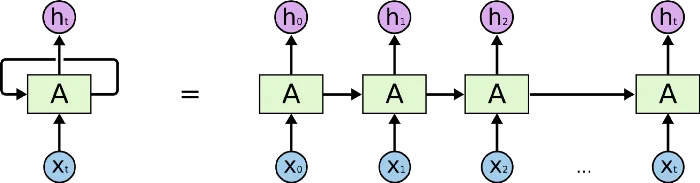

It is important to notice that H represents the neuron state. Therefore, when in state H_1, the neuron uses as input the parameter X_1 and H_0 (its previous state). The main problem of this model is the memory loss. The network older states are fast forgotten. In sequences where we need to remember beyond the immediate past, RNNs fail to remember.

**Long Short Term Memory unit(LSTM)**
LSTM was typically created to overcome the limitations of a Recurrent neural network (RNN). The Typical long data sets of Time series can actually be a time-consuming process which could typically slow down the training time of RNN architecture. We could restrict the data volume but this a loss of information. And in any time-series data sets, there is a need to know the previous trends and the seasonality of data of the overall data set to make the right predictions.

Before going into the brief explanation of LSTM cell, Let us see how the LSTM cell looks like :

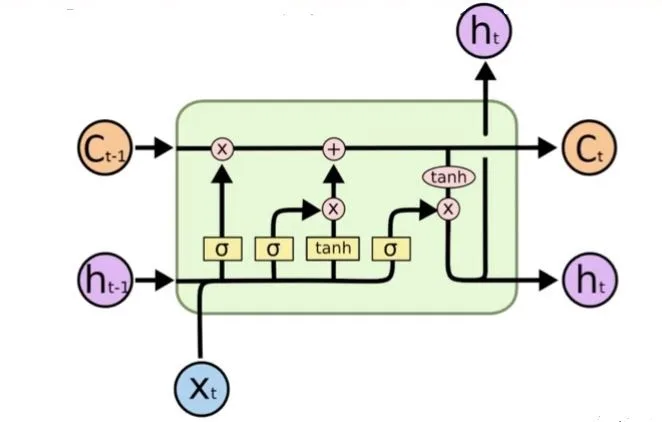

The Architecture may look little complicated on the first glance, but it is pretty neat and clear and easily understandable if we break it into parts.

Lets first start understanding what are our inputs and outputs. The typical input if you see on the left-hand side of the diagram Ct-1 which is the previous cell state and ht-1 which is the output from the previous cell and Xt which is the input of the present cell.

The output of the cell is Ct and ht which are the corresponding cell state and output of the present cell. The first step of an LSTM is the forget gate layer (f) where we determine what are we going to forget from the previous cell state. This typically takes the input ht-1 and Xt and make a linear transformation with some weights and bias terms and pass into the sigmoid function. As we are aware the output of a sigmoid function is always between 0 and 1. Here 0 will be considered as to forget it and 1 will represent to keep it

`Forget gate later=> f = Sigmoid ( Weights (ht-1,Xt) + bias)`

The second step is a two-part process and this is the step which tells us actually processing within this layer. Here in the first part we take the same inputs as before the ht-1 and Xt and make a linear transformation with some weights and biases and pass on to a sigmoid function. And the second part we will make a linear transformation again between ht-1 and Xt with some weights and biases but this time its going to be a hyperbolic tangent function (tanh). At the end of this step, we will get vectors of values which can be new candidate values for this present cell.

`First part => I = sigmoid( Weights (ht-1,Xt) + bias)`

`Second part => II = tanh( Weights (ht-1,Xt) + bias)`

The third step is the update step which helps us in deriving the new cell state Ct using our previous steps. First, we will multiply the previous cell state with the forget gate layer and add the vectors we got from the second step which forms the new cell state Ct of the present cell at t.

`Update layer => Ct = Ct-1 f + I II`

The final step is another main output of the cell, for this, we will directly form a linear transformation with the previous output ht-1 and input of the present cell Xt with some bias and weight terms and pass on to a sigmoid layer. Finally, now we will multiply this output to the new cell state Ct which is passed on to a hyperbolic tangent function. This gives us the present output ht.

`Final layer => i = sigmoid ( Weights (ht-1,xt) + bias)`

`final ht = i * tanh(Ct)`

Now we have a clear understanding of the step by step dissection of the LSTM layer. Let’s see how we apply our LSTM cell into a time series data.

**Active Power Uses Prediction**

- What can we predict
 - Forecast hourly consumption for the next day.
 - Forecast daily consumption for the next week.
 - Forecast daily consumption for the next month.
 - Forecast monthly consumption for the next year.
 - Modeling Methods
 
There are many modeling methods and few of those are as follows

- Naive Methods -> Naive methods would include methods that make very simple, but often very effective assumptions.
- Classical Linear Methods -> Classical linear methods include techniques are very effective for univariate time series forecasting
- Machine Learning Methods -> Machine learning methods require that the problem be framed as a supervised learning problem.
- K-nearest neighbors.
- SVM
- Decision trees
- Random forest
- Gradient boosting machines
- Deep Learning Methods -> combinations of CNN LSTM and ConvLSTM, have proven effective on time series classification tasks
- CNN
- LSTM
- CNN – LSTM

**Problem Framing:**

Given recent power consumption, what is the expected power consumption for the week ahead?
This requires that a predictive model forecast the total active power for each day over the next seven days

A model of this type could be helpful within the household in planning expenditures. It could also be helpful on the supply side for planning electricity demand for a specific household.
```
Input -> Predict

[Week1] -> Week2

[Week2] -> Week3

[Week3] -> Week4
```

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import nan
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense
from keras.models import Sequential

In [ ]:
data = pd.read_csv(
    "data/household_power_consumption.txt", sep=";", parse_dates=True, low_memory=False
)

In [ ]:
data.head()

In [ ]:
# Conacatenate Dante and Time
data["Date_Time"] = data["Date"].str.cat(data["Time"], sep=" ")

In [ ]:
data.head()

In [ ]:
# Dropping Date and Time from the data as its not needed.
data.drop(["Date", "Time"], inplace=True, axis=1)
data.head()

In [ ]:
# Converting Date_Time to Index
data.set_index(["Date_Time"], inplace=True)
data.head()

Next, we can mark all missing values indicated with a ‘?‘ character with a NaN value, which is a float.

In [ ]:
# Replacing "?" in our data with nan.
data.replace("?", nan, inplace=True)

In [ ]:
data.info()

In [ ]:
# Converting all data values into float
data = data.astype("float")

In [ ]:
data.info()

In [ ]:
np.isnan(data).sum()

We also need to fill in the missing values now that they have been marked.

A very simple approach would be to copy the observation from the same time the day before. We can implement this in a function named fill_missing() that will take the NumPy array of the data and copy values from exactly 24 hours ago.

In [ ]:
# Replacing all NAN values to some actual values.
# We will convert any NAN values to the same value from the last available Data_Time.


def fill_missing(data):

    one_day = 24 * 60

    for row in range(data.shape[0]):

        for col in range(data.shape[1]):

            if np.isnan(data[row][col]):
                data[row][col] = data[row - one_day, col]

In [ ]:
fill_missing(data.values)

In [ ]:
# Now we can see all NAN are replaced.
np.isnan(data).sum()

In [ ]:
data.describe()

Here, we can observe that we have 2075259 datapoints and 7 features

In [ ]:
data.shape

**Prepare power consumption for each day**

We can now save the cleaned-up version of the dataset to a new file; in this case we will just change the file extension to .csv and save the dataset as ‘cleaned_data.csv‘.

In [ ]:
# Parsing Date_time to datetime format and prepare power consumption per day.
# The current data has consumption for each minutes in a day.
data.to_csv("data/cleaned_household_power_consumption.csv")

In [ ]:
dataset = pd.read_csv(
    "data/cleaned_household_power_consumption.csv",
    parse_dates=True,
    index_col="Date_Time",
    low_memory=False,
)

In [ ]:
dataset.head()

In [ ]:
dataset.tail()

**Exploratory Data Analysis**

In [ ]:
# Summing all values based on day. "D" is used for day.
data = dataset.resample("D").sum()

In [ ]:
# Now we can see the data os available per day instead of per minutes.
data.head()

**Plotting the all features in various time stamps**

In [ ]:
# Plotting some of the data for each column to visualize.
fig, ax = plt.subplots(figsize=(18, 18))

for i in range(len(data.columns)):

    plt.subplot(len(data.columns), 1, i + 1)
    name = data.columns[i]
    plt.plot(data[name])
    plt.title(name, y=0)
    plt.yticks([])

plt.show()
fig.tight_layout()

**Exploring Active power consumption for each year**

In [ ]:
# We are only intrested in Global Active Power. So lets plot the graph for it for aall years.
years = ["2007", "2008", "2009", "2010"]

**Year wise plotting of feature Global_active_power**

In [ ]:
# Plotting data for Global Active Power to visualize for each years.
fig, ax = plt.subplots(figsize=(18, 18))

for i in range(len(years)):

    ax = plt.subplot(len(years), 1, i + 1)
    year = years[i]
    active_power_data = data[str(year)]
    plt.plot(active_power_data["Global_active_power"])
    plt.title(str(year), y=0, loc="left")

plt.show()
fig.tight_layout()

**Power consumption distribution with histogram**

**Year wise histogram plot of feature Global_active_power**

In [ ]:
# Visualize using Histogram
# Plotting data for Global Active Power to visualize for each years.
fig, ax = plt.subplots(figsize=(18, 18))

for i in range(len(years)):

    ax = plt.subplot(len(years), 1, i + 1)
    year = years[i]
    active_power_data = data[str(year)]
    active_power_data["Global_active_power"].hist(bins=200)
    plt.title(str(year), y=0, loc="left")

plt.show()
fig.tight_layout()

In [ ]:
# Plotting histogram for full data
fig, ax = plt.subplots(figsize=(18, 18))

for i in range(len(data.columns)):

    plt.subplot(len(data.columns), 1, i + 1)
    name = data.columns[i]
    data[name].hist(bins=200)
    plt.title(name, y=0)
    plt.yticks([])

plt.show()
fig.tight_layout()

In [ ]:
data["2007-01"]["Global_active_power"]

In [ ]:
# Plot power consumption histogram for each month of 2007
months = [i for i in range(1, 13)]

fig, ax = plt.subplots(figsize=(18, 18))

for i in range(len(months)):
    ax = plt.subplot(len(months), 1, i + 1)
    month = "2007-" + str(months[i])
    active_power_data = data[month]
    active_power_data["Global_active_power"].hist(bins=100)
    ax.set_xlim(0, 5)
    plt.title(month, y=0, loc="right")

plt.show()
fig.tight_layout()

**Observation :**

1. From the above diagram we can say that power consumption in the month of Nov, Dec, Jan, Feb, Mar is more as there is a long tail as compare to other months.

2. It also shows that the during the winter seasons, the heating systems are used and not in summer.

3. The above graph is highly concentrated on 0.3W and 1.3W.

In [ ]:
data.head()

In [ ]:
# Before 2010 is Training and after 2010 is Testing dataset.
data_train = data.loc[:"2009-12-31", :]["Global_active_power"]
data_train.head()

In [ ]:
data_test = data["2010"]["Global_active_power"]
data_test.head()

In [ ]:
data_train.shape, data_test.shape

In [ ]:
# Prepare Training Data.
# 1st 7 days will be input and next 7 days will be output data
data_train.head(14)

In [ ]:
data_train = np.array(data_train)

In [ ]:
x_train, y_train = [], []

for i in range(7, len(data_train) - 7):
    x_train.append(data_train[i - 7 : i])
    y_train.append(data_train[i : i + 7])

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape, y_train.shape

In [ ]:
pd.DataFrame(x_train)

In [ ]:
pd.DataFrame(y_train)

In [ ]:
# Bringing data between 0 and 1
x_scaler = MinMaxScaler()
x_train = x_scaler.fit_transform(x_train)

In [ ]:
# Bringing data between 0 and 1
y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train)

In [ ]:
pd.DataFrame(x_train).head(), pd.DataFrame(y_train).head()

In [ ]:
x_train.shape, y_train.shape

In [ ]:
# Converting 2D to 3D data.
x_train = x_train.reshape(1098, 7, 1)

**Build LSTM Model**

In [ ]:
regressior = Sequential()

regressior.add(
    LSTM(units=200, activation="relu", input_shape=(7, 1))
)  # We have 7 timestamps and 1 feature.

regressior.add(Dense(7))

In [ ]:
regressior.compile(loss="mse", optimizer="adam")

In [ ]:
regressior.summary()

In [ ]:
regressior.fit(x_train, y_train, epochs=100)

In [ ]:
# Prepare Test Dataset
data_test = np.array(data_test)

In [ ]:
x_test, y_test = [], []

for i in range(7, len(data_test) - 7):
    x_test.append(data_test[i - 7 : i])
    y_test.append(data_test[i : i + 7])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
x_test = x_scaler.transform(x_test)
y_test = y_scaler.transform(y_test)

In [ ]:
x_test.shape, y_test.shape

In [ ]:
x_test = x_test.reshape(331, 7, 1)

In [ ]:
# Making Predictions
y_pred = regressior.predict(x_test)

In [ ]:
y_pred

In [ ]:
# Inveres Transorming to original data
y_pred = y_scaler.inverse_transform(y_pred)

In [ ]:
y_pred

In [ ]:
y_true = y_scaler.inverse_transform(y_test)

In [ ]:
y_true

**Evaluate Model**

In [ ]:
def evaluate_model(y_true, y_predicted):
    scores = []

    # Calculate scores for each day
    for i in range(y_true.shape[1]):
        mse = mean_squared_error(y_true[:, i], y_predicted[:, i])
        rmse = np.sqrt(mse)
        scores.append(rmse)

    # Calculate score for whole predictions
    total_score = 0
    for row in range(y_true.shape[0]):
        for col in range(y_predicted.shape[1]):
            total_score = total_score + (y_true[row, col] - y_predicted[row, col]) ** 2
    total_score = np.sqrt(total_score / (y_true.shape[0] * y_predicted.shape[1]))

    return total_score, scores

In [ ]:
evaluate_model(y_true, y_pred)

In [ ]:
# If the scores are less than standard deviation then our model is good.
np.std(y_true[0])